In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
df = pd.read_csv("Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print(df.shape)

(14640, 15)


Text(0.5, 1.0, 'Events Distribution')

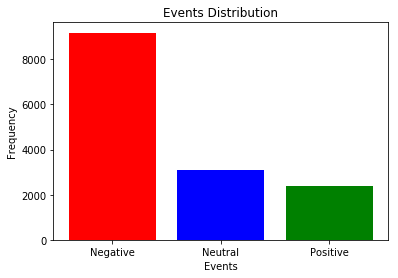

In [7]:
index = [1,2,3]
plt.bar(index, df['airline_sentiment'].value_counts(), color=['r','b','g'])
plt.xticks(index,['Negative','Neutral','Positive'])
plt.xlabel('Events')
plt.ylabel('Frequency')
plt.title('Events Distribution')

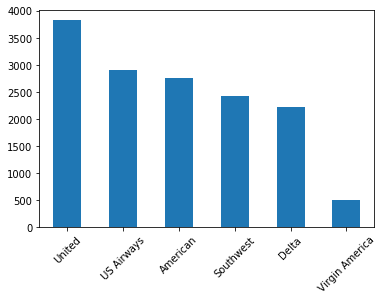

In [8]:
Airline_count = df['airline'].sort_index().value_counts()
Airline_count.plot(kind='bar', rot=45)
plt.show()

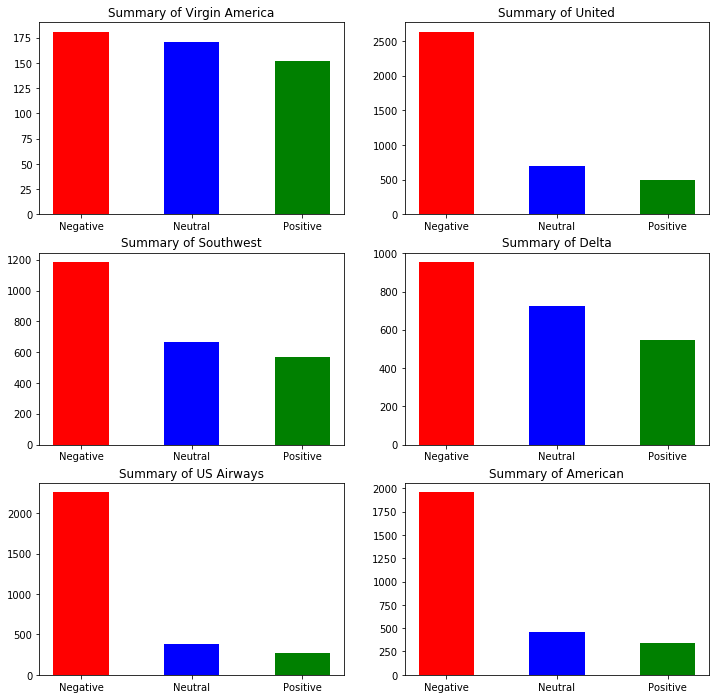

In [10]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color = ['red','blue','green']
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))

for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])
plt.show()

In [12]:
NR_Count = dict(df['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        NR_df=df
    else:
        NR_df=df[df['airline']==Airline]
    count=dict(NR_df['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    NR_df=NR_Count(Airline)
    count=NR_df['count']
    Index = range(1,(len(NR_df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,NR_df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

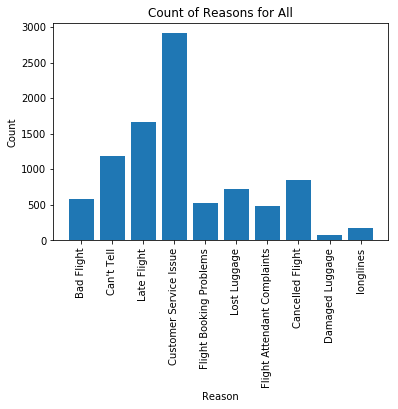

In [13]:
plot_reason('All')
plt.show()

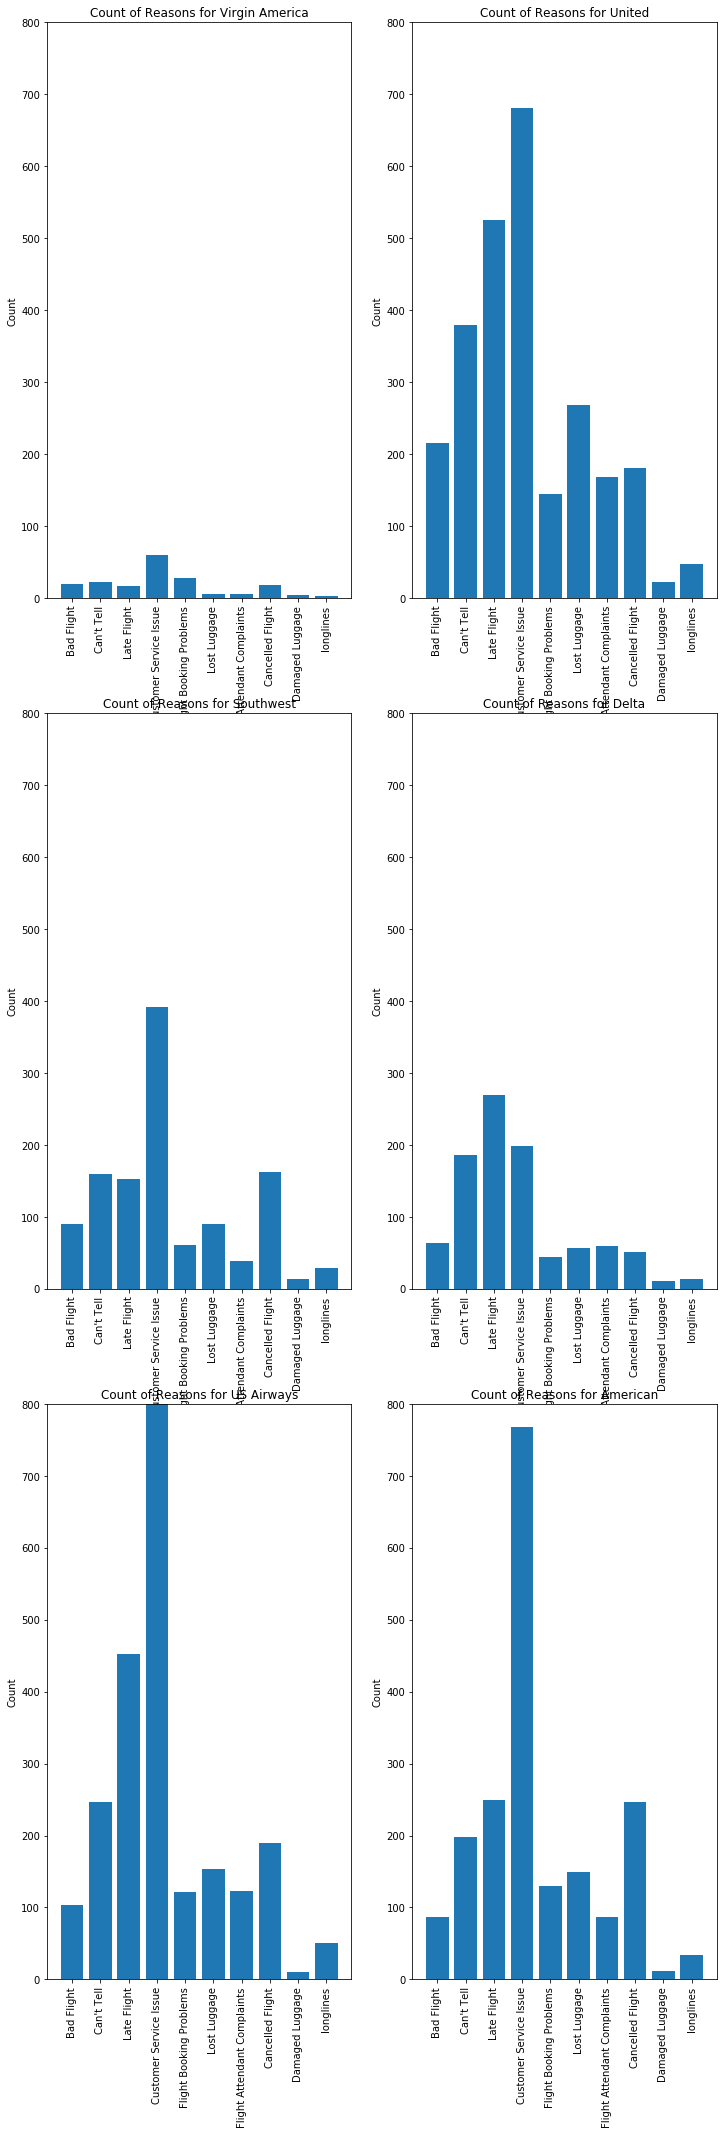

In [14]:
airline_names = df['airline'].unique()
plt.figure(1,figsize=(12,36))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    plot_reason(airline_names[i])
    plt.xlabel('')
    plt.ylim(0,800)
plt.show()

In [16]:
def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [19]:
pd.set_option('display.max_colwidth', -1) 
df['normalized_tweet'] = df.text.apply(normalizer)
df[['text','normalized_tweet']].head()

,text,normalized_tweet
0,@VirginAmerica What @dhepburn said.,"[dhepburn, said]"
1,@VirginAmerica plus you've added commercials to the experience... tacky.,"[added, commercial, experience, tacky]"
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,"[today, must, mean, need, take, another, trip]"
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,@VirginAmerica and it's a really big bad thing about it,"[really, big, bad, thing]"


In [21]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
df['grams'] = df.normalized_tweet.apply(ngrams)
df[['grams']].head()

,grams
0,[dhepburn said]
1,"[added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]"
2,"[today must, must mean, mean need, need take, take another, another trip, today must mean, must mean need, mean need take, need take another, take another trip]"
3,"[really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse, really aggressive blast, aggressive blast obnoxious, blast obnoxious entertainment, obnoxious entertainment guest, entertainment guest face, guest face amp, face amp little, amp little recourse]"
4,"[really big, big bad, bad thing, really big bad, big bad thing]"


In [22]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [24]:
df[(df.airline_sentiment == 'negative')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 449),
 ('customer service', 438),
 ('cancelled flightled', 425),
 ('late flight', 215),
 ('cancelled flighted', 196),
 ('flight cancelled', 185),
 ('late flightr', 144),
 ('cancelled flight', 131),
 ('hold hour', 128),
 ('flightled flight', 123),
 ('flight cancelled flightled', 117),
 ('flight delayed', 115),
 ('cancelled flightled flight', 107),
 ('call back', 106),
 ('booking problem', 98),
 ('gate agent', 83),
 ('flight flight', 74),
 ('hour late', 69),
 ('delayed flight', 69),
 ('flight attendant', 60)]

In [26]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [27]:
vectorized_data = count_vectorizer.fit_transform(df.text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [34]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,normalized_tweet,grams
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[dhepburn, said]",[dhepburn said]
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[added, commercial, experience, tacky]","[added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]"


In [28]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = df.airline_sentiment.apply(sentiment2target)

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [35]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [36]:
clf.score(data_test, targets_test)

0.7851775956284153

In [40]:
sentences = count_vectorizer.transform([
    "What a great airline, the trip was a pleasure!",
    "My issue was quickly resolved after calling customer support. Thanks!",
    "What the hell! My flight was cancelled again. This sucks!",
    "Service was awful. I'll never fly with you again.",
    "You fuckers lost my luggage. Never again!",
    "I have mixed feelings about airlines. I don't know what I think.",
    ""
])
clf.predict_proba(sentences)

array([[0.20459395, 0.05793439, 0.73747166],
       [0.13630858, 0.07014819, 0.79354323],
       [0.9438463 , 0.03923604, 0.01691766],
       [0.89226546, 0.07137224, 0.0363623 ],
       [0.97416608, 0.01692252, 0.0089114 ],
       [0.46901121, 0.5005041 , 0.03048469],
       [0.26204434, 0.52305198, 0.21490368]])

In [41]:
# Lets try deep learning
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [42]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [43]:
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [45]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

,text,airline_sentiment
0,What said.,neutral
1,plus added commercials experience... tacky.,positive
2,today... Must mean need take another trip!,neutral
3,"really aggressive blast obnoxious ""entertainment"" guests' faces &amp; little recourse",negative
4,really big bad thing,negative


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [51]:
X_train.head()

9709     kind screwed day up, least outbound, save stranding                                          
12212    going police dept due sexual assult stewardess allowed occur lack concern                    
11438    that's ok, know I'll likely never book                                                       
13844    odds bag picked someone not another country? Because says located yet.                       
8781     Guys, really bad #fail Someone better call wife back get handled. 203-382-3312 waits hold....
Name: text, dtype: object

In [47]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('flight', 3540), ('not', 1420), ('no', 1354), ('get', 1220), ('t', 1123)]


In [48]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

"What said." is converted into [720, 1025, 56, 213, 321, 1920, 1205, 2892]


In [76]:
print(X_train_seq[1:10])

[[57, 1790, 1254, 103, 3442, 2893, 1384, 736, 4255, 521, 1026], [115, 283, 48, 181, 1157, 58, 154], [3443, 34, 1108, 106, 2, 78, 781, 1109, 191, 1486, 179], [46, 69, 139, 279, 106, 155, 31, 395, 32, 4, 1110, 4256, 4257, 6035, 3444, 19], [322, 78, 1, 334, 156, 2894, 378, 4258, 122, 568], [344, 737, 95, 310, 6036, 6037], [28, 630, 85, 46, 6038], [919, 2099, 2541, 7, 5, 6, 6039], [3, 30, 83, 142, 72, 132, 18, 21, 6040, 4259, 111, 214, 738, 920, 68]]


In [49]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[720, 1025, 56, 213, 321, 1920, 1205, 2892]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 8.0 features with a value of 1.


In [78]:
print(X_train_oh.shape)

(13176, 10000)


In [50]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"neutral" is converted into 0
"0" is converted into [1. 0. 0.]


In [52]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (1318, 10000)


In [53]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [54]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [55]:
base_history = deep_model(base_model)

Instructions for updating:
Use tf.cast instead.


In [56]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

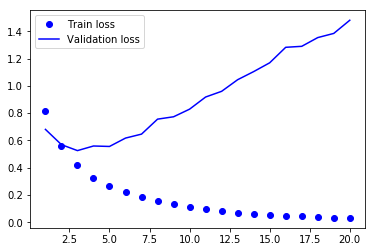

In [57]:
eval_metric(base_history, 'loss')

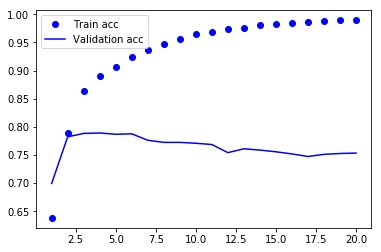

In [58]:
eval_metric(base_history, 'acc')

In [59]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 320,131
Trainable params: 320,131
Non-trainable params: 0
_________________________________________________________________


In [60]:
reduced_history = deep_model(reduced_model)

In [61]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

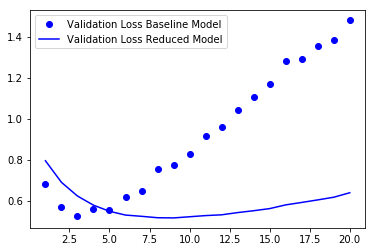

In [62]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

In [63]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [64]:
reg_history = deep_model(reg_model)

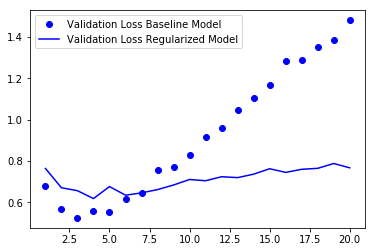

In [65]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

In [66]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [67]:
drop_history = deep_model(drop_model)

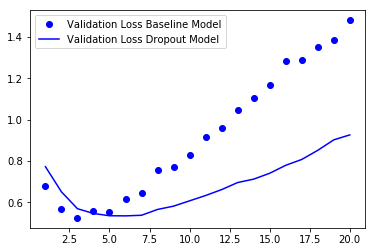

In [68]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

In [69]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [70]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

1464/1464 [==============================] - 0s 148us/step
/n
Test accuracy of baseline model: 77.05%


In [71]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

1464/1464 [==============================] - 0s 99us/step
/n
Test accuracy of reduced model: 78.35%


In [72]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

1464/1464 [==============================] - 0s 122us/step
/n
Test accuracy of regularized model: 76.50%


In [73]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

1464/1464 [==============================] - 0s 115us/step
/n
Test accuracy of dropout model: 78.07%


In [103]:
# CNN Model
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
import time
import datetime

max_words = 1000
max_len = 150

def get_cnn_model(num_class=2):   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2048, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    return model

In [104]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          100000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 148, 1024)         308224    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              2099200   
__________

In [105]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

In [120]:
Y = df.airline_sentiment
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(df.text, Y, test_size=0.15)

In [123]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [124]:
from keras.optimizers import RMSprop, Adam
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Training Model ...\n")

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-06-19 17:11:08


Compliling Model ...

Training Model ...

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 9955 samples, validate on 2489 samples
Epoch 1/100
9955/9955 [==============================] - 36s 4ms/step - loss: 1.3636 - acc: 0.5435 - val_loss: 0.6617 - val_acc: 0.7107
Epoch 2/100
9955/9955 [==============================] - 35s 4ms/step - loss: 0.8374 - acc: 0.6874 - val_loss: 0.5964 - val_acc: 0.7618
Epoch 3/100
9955/9955 [==============================] - 35s 4ms/step - loss: 0.6685 - acc: 0.7358 - val_loss: 0.5726 - val_acc: 0.7762
Epoch 4/100
9955/9955 [==============================] - 34s 3ms/step - loss: 0.5739 - acc: 0.7728 - val_loss: 0.5636 - val_acc: 0.7754
Epoch 5/100
9955/9955 [==============================] - 35s 3ms/step - loss: 0.5228 - acc: 0.7921 - val_loss: 0.5669 - val_acc: 0.7702
Epoch 6/100
9955/9955 [==============================] - 34s 3ms/step - loss: 0.4909 - acc: 0.8050 - val_l

9955/9955 [==============================] - 35s 4ms/step - loss: 0.0935 - acc: 0.9661 - val_loss: 1.3453 - val_acc: 0.7473
Epoch 58/100
9955/9955 [==============================] - 33s 3ms/step - loss: 0.0954 - acc: 0.9664 - val_loss: 1.3570 - val_acc: 0.7469
Epoch 59/100
9955/9955 [==============================] - 33s 3ms/step - loss: 0.0947 - acc: 0.9658 - val_loss: 1.3634 - val_acc: 0.7505
Epoch 60/100
9955/9955 [==============================] - 33s 3ms/step - loss: 0.0949 - acc: 0.9644 - val_loss: 1.4290 - val_acc: 0.7389
Epoch 61/100
9955/9955 [==============================] - 34s 3ms/step - loss: 0.0930 - acc: 0.9684 - val_loss: 1.4324 - val_acc: 0.7429
Epoch 62/100
9955/9955 [==============================] - 33s 3ms/step - loss: 0.0951 - acc: 0.9641 - val_loss: 1.4179 - val_acc: 0.7465
Epoch 63/100
9955/9955 [==============================] - 32s 3ms/step - loss: 0.0850 - acc: 0.9683 - val_loss: 1.4330 - val_acc: 0.7529
Epoch 64/100
9955/9955 [==============================